In [10]:
import yfinance as yf
# data_start = yf.download("000300.SS", start="2017-12-07")
data_end = yf.download("000300.SS", start="2019-12-31")
# print(data_start["Close"].iloc[0])
print(data_end["Close"])

[*********************100%***********************]  1 of 1 completed

Date
2021-03-11    5128.220215
2021-03-12    5146.379883
2021-03-15    5035.540039
2021-03-16    5079.359863
2021-03-17    5100.859863
                 ...     
2024-09-23    3212.760010
2024-09-24    3351.909912
2024-09-25    3401.530029
2024-09-26    3545.320068
2024-09-27    3703.684814
Name: Close, Length: 864, dtype: float64


In [43]:
csi300_20171207 = 3971.06
csi300_end = 4096.58
csi300_return = (csi300_end-csi300_20171207)/csi300_20171207
csi300_return

0.031608688863930534

In [44]:
import pandas as pd
predictions = pd.read_csv('./predictions/csi300_predictions_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)
backtest_returns = pd.read_csv('./backtesting/csi300_backtest_returns_varlingam_lag_1.csv', delimiter=',', index_col=False, header=0)

In [45]:
winner_num = backtest_returns.iloc[:,0].tolist()
ar = backtest_returns.iloc[:,1].tolist()
ar_self = backtest_returns.iloc[:,2].tolist()
baseline_annualized_return = (1+csi300_return)**(252/predictions.shape[0])-1
ar_baseline = [baseline_annualized_return]*len(winner_num)

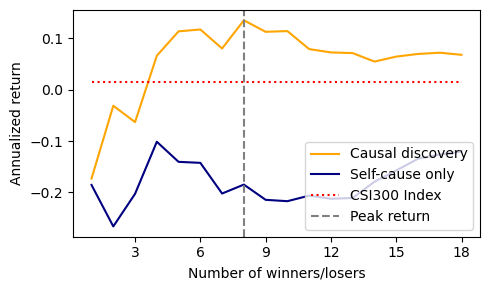

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,3))
plt.plot(winner_num, ar, label = 'Causal discovery', color = 'orange')
plt.plot(winner_num, ar_self, label = 'Self-cause only', color = 'navy')
plt.plot(winner_num, ar_baseline, label = 'CSI300 Index', color = 'red', linestyle=':')
peak_index = np.argmax(ar)
peak_x = int(winner_num[peak_index])
peak_y = round(ar[peak_index],2)
plt.axvline(x=peak_x, color='gray', linestyle='--', label=f'Peak return')
# plt.text(peak_x, peak_y, f'({peak_x}, {peak_y})', fontsize=12, ha='left', va='baseline')
plt.xlabel('Number of winners/losers')
plt.ylabel('Annualized return')
plt.xticks([x for x in winner_num if x % 3 == 0])
plt.legend()
plt.tight_layout()
plt.savefig('./plots/csi300_portfolio_performance_plot_varlingam_lag_1.pdf')